In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

In [3]:
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# Section 2: Loading and Basic Data Understanding

## Section 2.1: Loading Dataset

In [5]:
boombikes= pd.read_csv('D:\Data Science IITB\Linear Regression Assignment/day.csv')
boombikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.11085,18.18125,80.58330,10.74988,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.90260,17.68695,69.60870,16.65211,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.05092,9.47025,43.72730,16.63670,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.20000,10.60610,59.04350,10.73983,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.30524,11.46350,43.69570,12.52230,82,1518,1600


## Section 2.2: Basic Observations and Data Understanding

In [6]:
print(f'Given datset contains {boombikes.shape[0]} rows and {boombikes.shape[1]} columns.')

Given datset contains 730 rows and 16 columns.


In [7]:
boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Observations:

#### * Dataset contains 730 rows 
#### * Dataset contains 15 columns
#### * Dataset does not have null values. Hence, null value handling will not be done as a part of this assignment

# checking for duplicates values:

len(boombikes[boombikes.duplicated()])

#### It contains "No" duplicate value

### Section 2.2.1: Feature Understanding

#### Following information about various columns has been extracted from data dictionary. Columns further understanding is highlighted by the reseacher wherever an explanation is needed:

In [8]:
# instant: record index This column acts just as a serial number and is thus reduntant. It will be dropped in next step.
# dteday: date Since purpose of this assignmnet is aimed at linear regression, and we have been given the day of the week, month, year, holiday data in separate columns, we will drop this column in next step too.

#### Dropping feature based on above shared logic

In [9]:
# creating variable to store list of feature names to be dropped
drop_col = ['instant', 'dteddy']

# creating a loop to drop the columns
for i in boombikes.columns:
    if i in drop_col:
        boombikes.drop(labels= i, axis= 1, inplace= True)
        
#Inspecting dataframe
boombikes.head(2)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.11085,18.18125,80.58330,10.74988,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.90260,17.68695,69.60870,16.65211,131,670,801


#### Basic Data Propriety Assesment

In [10]:
boombikes.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.00000,730.00000,730.00000,730.00000,730.00000,730.00000,730.00000,730.00000,730.00000,730.00000,730.00000,730.00000,730.00000,730.00000
mean,2.49863,0.50000,6.52603,0.02877,2.99726,0.68356,1.39452,20.31926,23.72632,62.76517,12.76362,849.24932,3658.75753,4508.00685
std,1.11018,0.50034,3.45022,0.16727,2.00616,0.46541,0.54481,7.50673,8.15031,14.23759,5.19584,686.47987,1559.75873,1936.01165
min,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,2.42435,3.95348,0.00000,1.50024,2.00000,20.00000,22.00000
25%,2.00000,0.00000,4.00000,0.00000,1.00000,0.00000,1.00000,13.81189,16.88971,52.00000,9.04165,316.25000,2502.25000,3169.75000
50%,3.00000,0.50000,7.00000,0.00000,3.00000,1.00000,1.00000,20.46583,24.36822,62.62500,12.12533,717.00000,3664.50000,4548.50000
75%,3.00000,1.00000,10.00000,0.00000,5.00000,1.00000,2.00000,26.88061,30.44577,72.98958,15.62559,1096.50000,4783.25000,5966.00000
max,4.00000,1.00000,12.00000,1.00000,6.00000,1.00000,3.00000,35.32835,42.04480,97.25000,34.00002,3410.00000,6946.00000,8714.00000


### Obervations:

#### • Season:Season column has 4 values depiciting each of the 4 seasons.

#### • yr: Data comprises of exactly 2 years 

#### • mnth: Number of months is exactly 12 hence no abnormalities noticed.

#### • holiday: Max is 1 and Min is O. No deviation in this bollean column

#### • weekday: Weekdays are depicted as exactly 70 to 6) corresponding to each day name. On checking data, it was noticed that the numeric values start from 0 on Sunday.

#### * weathersit: As per data dictionary, we are supposed to have 4 weather situations whereas the data does not contain 4th weather. The values corerspond to weather situation 1 OR 2 OR 3 only. 

#### • temp: Variance of temperature is between 2.4 and 35.3 with median value of 20.5. This is indicative of tropical climate in the region as per Wikipedia Article that places mean temperature of tropical regions at around 18+ degree celsius: https://en.wikipedia.org/wiki/Tropical_ climate This could, to a certain extent, possibly explain the absence of fourth season.

#### • hum: Humidity levels Q1 and Q3 are 50% + showing a relatively humid weather. 

#### • windpeed: Windspeed doesnt show a heavy variance. Relatively calmer winds. 

#### •casual: Relatively high variance as compared to 'registered.

#### • registered: With given numbers, it seems to be more in line with the trend on target variable (cnt).

### Transforming season, weathersit, mnth and weekday columns based on above logic

In [11]:
# Transforming weatherlist feature:

boombikes['weathersit']= boombikes['weathersit'].map({1: 'Clear to Partly Cloudy', 2: 'Misty and Cloudy', 3: 'Light Rain or Snow', 4: 'Heavy Rain or Snow'})

# Transforming season feature:

boombikes['season']= boombikes['season'].map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})

# Mapping Month feature:

boombikes['mnth']= boombikes['mnth'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
                                         7: 'Jul', 8:'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12:'Dec'})

# Mapping Weekday feature:

boombikes['weekday']= boombikes['weekday'].map({0: 'Sun', 1:'Mon', 2:'Tue', 3: 'Wed', 4:'Thu', 5:'Fri', 6: 'Sat'})

# Re-observing The dataset

boombikes.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,Spring,0,Jan,0,Sat,0,Misty and Cloudy,14.11085,18.18125,80.58330,10.74988,331,654,985
1,02-01-2018,Spring,0,Jan,0,Sun,0,Misty and Cloudy,14.90260,17.68695,69.60870,16.65211,131,670,801
2,03-01-2018,Spring,0,Jan,0,Mon,1,Clear to Partly Cloudy,8.05092,9.47025,43.72730,16.63670,120,1229,1349
3,04-01-2018,Spring,0,Jan,0,Tue,1,Clear to Partly Cloudy,8.20000,10.60610,59.04350,10.73983,108,1454,1562
4,05-01-2018,Spring,0,Jan,0,Wed,1,Clear to Partly Cloudy,9.30524,11.46350,43.69570,12.52230,82,1518,1600


# Section 3: Exploratory Data Analysis


## Section 3.1: Univariate Analysis

### Section 3.1.1: Target Variable

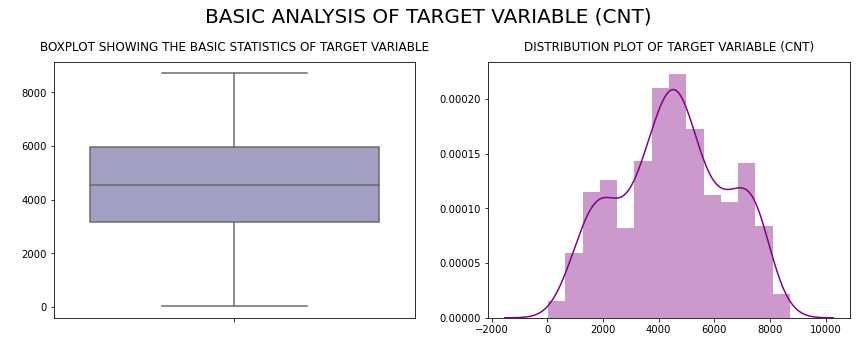

In [12]:

# Creating subplot grid:
fig, ax= plt.subplots(nrows= 1, ncols= 2, figsize= (12, 5))

# Creating main title
fig.suptitle('basic analysis of target variable (cnt)'.upper (), fontsize= 20)

# Populating plot1:
sns. boxplot (y=boombikes['cnt'], ax= ax[0], palette='Purples')
ax[0].set_title('boxplot showing the basic statistics of target variable'.upper(),
                fontsize= 12, fontweight=20, y=1.02)
ax[0].set_ylabel(' ')
ax[0].set_xlabel(' ')

# Population plot2:
sns.distplot(boombikes['cnt'], ax= ax[1], color= 'purple')
ax[1].set_title('distribution plot of target variable (cnt)'.upper(),
               fontsize= 12, fontweight= 20, y= 1.02)
ax[1].set_ylabel(' ')
ax[1].set_xlabel(' ')

# Setting aesthetics
plt.tight_layout()
plt.show()

### Observations:

#### • Target variable shows an almost normal distribution of values with 2 distinct plateaus on either side

#### • Q1 of target variable lies at around 3000 and Q3 at around 6000. IQ thus is approximately 3000 with median at around 4500 value

### Section 3.1.2: Continous Independent Variables

In [13]:
# creating a lsit of continous independent variables for analytics
cont_var= [i for i in boombikes.select_dtypes(exclude= 'object').columns if boombikes[i].nunique() > 2 and i != 'cnt']

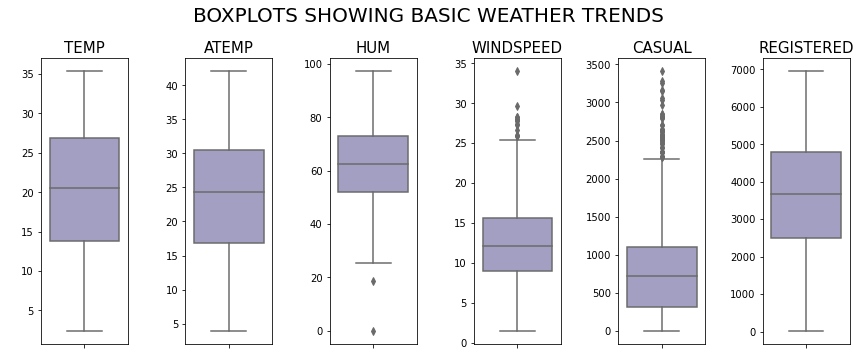

In [14]:
# creating a subplot grid
fig, ax= plt.subplots(nrows= 1, ncols=len(cont_var), figsize= (12,5))

# placing main title
plt.suptitle('boxplots showing basic weather trends'.upper(), fontsize= 20)

# looping to fill subplot grid with plots
for i in range(len(cont_var)):
    sns.boxplot(y=boombikes[cont_var[i]], ax= ax[i], palette= 'Purples')
    
    #setting aesthetics and readablity
    ax[i].set_title(f'{cont_var[i].upper()}', fontsize= 15)
    ax[i].set_ylabel(' ')
    
# Setting final aesthetics
plt.tight_layout()
plt.show()

### Observations: 

#### • Q1 and Q3 of temp is distributed between 14 and 27 with median as 21

#### • Q1 and Q3 of temp is distributed between 17 and 31 with median as 24 

#### • Humidity and windspeed have shown presence of outliers and casual

#### • Temp and Atemp appear to be almost normally distributed

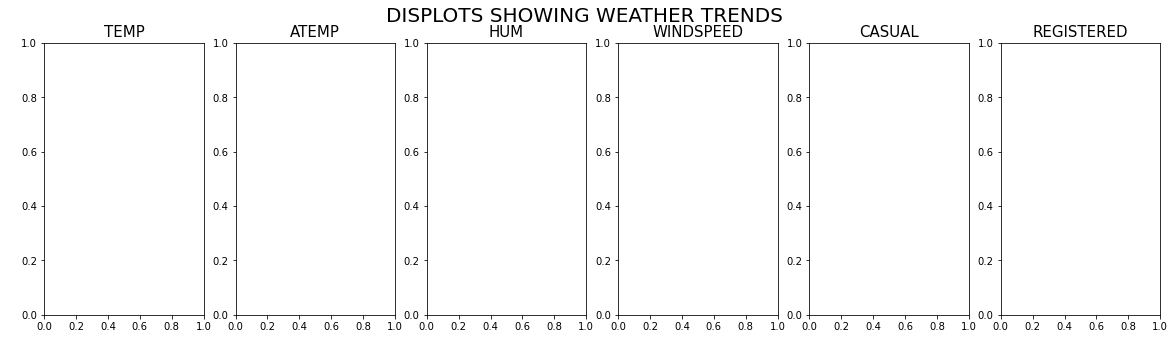

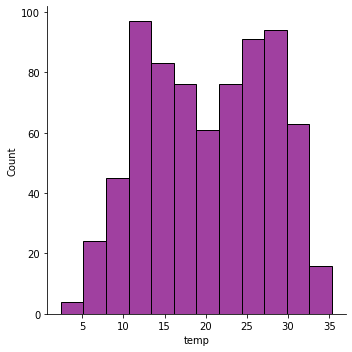

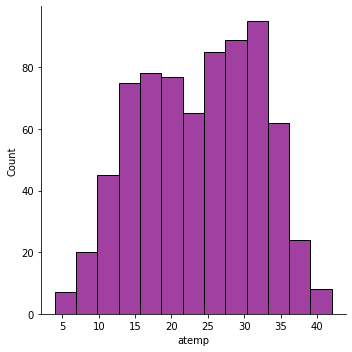

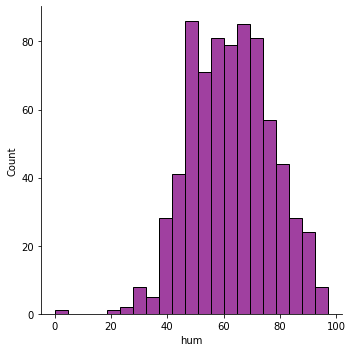

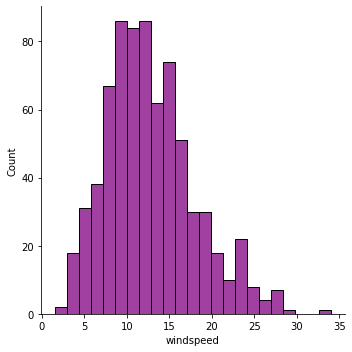

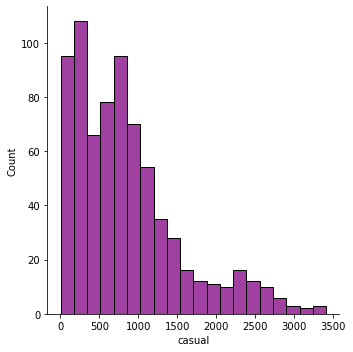

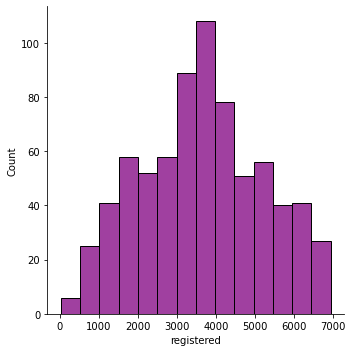

In [15]:
# creating a subplot grid
fig, ax= plt.subplots(nrows= 1, ncols= len(cont_var), figsize= (20,5))

# placing main title
plt.suptitle('displots showing weather trends'.upper(), fontsize= 20)

# looping to fill subplot grid with plots
for i in range(len(cont_var)):
    sns.displot(boombikes[cont_var[i]], ax= ax[i], color= 'purple')
    
     #setting aesthetics and readablity
    ax[i].set_title(f'{cont_var[i].upper()}', fontsize= 15)
    ax[i].set_ylabel(' ')
    
# Setting final aesthetics
plt.tight_layout()
plt.show()

### Observations:

#### *Above distplot prove our earlier intuitive understanding of variables as incorrect - Temp and atemp have shown double peaks.

#### *Humidity and Windspeed are left and right skewed respectively.

#### *Casual shows high right skew.

#### *Registered shows similar trend as target variable but plateaus on either side are relatively smoother. 

## Section 3.1.3: Categorical Independent Variables

In [16]:
# creating a list of categorical independent variables for analysis
cat_var= [i for i in boombikes.select_dtypes(include= 'object').columns]
cat_var.extend([i for i in boombikes.columns if boombikes[i].nunique() == 2])

IndexError: index 3 is out of bounds for axis 1 with size 3

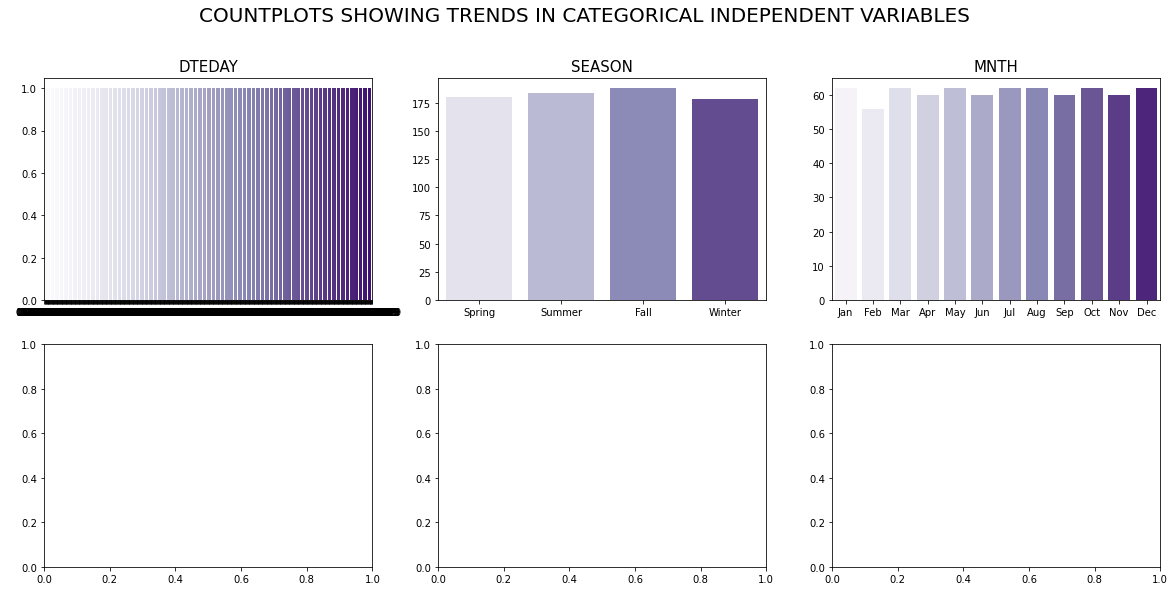

In [17]:
# creating a subplot grid
fig, ax= plt.subplots(nrows= 2, ncols= int(len(cont_var)/2), figsize= (20,9))

#placing main title
plt.suptitle('countplots showing trends in categorical independent variables'.upper(), fontsize= 20, fontweight= 20, y=  0.99)

#looping to fill subplot grid with plots
k= 0
for i in range(2):
    for j in range(int(len(cat_var)/2)):
        sns.countplot(boombikes[cat_var[k]], ax= ax[i, j], palette= 'Purples')
        
        #setting aesthetics and readability
        ax[i,j].set_title(f'{cat_var[k].upper()}', fontsize= 15)
        ax[i,j].set_ylabel(' ')
        ax[i,j].set_xlabel(' ')
        
        k+=1
        
#setting final aesthetics
plt.tight_layout()
plt.show()

### Observations:

#### • Fall is found to be the longest season, followed by summer, followed by Spring. Shortest season is winter.

#### • Weathersit shows just 3 types of weathers. There is not even a single day on which Heavy rain/ snow has occured. Weather has been clear OR partly cloudy for most of the days in both years. 

#### • The peculier combination of Season and Weathersit also shows the location of the city in dataset is in tropical region with limited rainfall and is akin to the weather of one of the west coastal cities of US somewhere in California (Ex: Los Angeles/ San Francisco etc. This statement is further supported by the observed data of humidity, temp and atemp. 

## Section 3.2: Bivariate Analysis 

### Section 3.2.1: Continous Independent Variables

In [ ]:
# creating a subplot grid
fig, ax= plt.subplots(nrows= 2, ncols= int(len(cont_var)/2), figsize= (20,9))

#placing main title
plt.suptitle('relationship of continous variables with target variable'.upper(), fontsize=20, fontweight= 20, y=0.99)

#looping to fill subplot grid with plots
k= 0
for i in range(2):
    for j in range(int(len(cont_var)/2)):
        sns.regplot(x= boombikes[cont_var[k]], y=boombikes['cnt'], ax= ax[i, j],
                                 scatter_kws= {'color': 'yellow'}, line_kws= {'color': 'purple'})
        
        # setting aesthetics and readbility
        ax[i,j].set_title(f'{cont_var[k].upper()}', fontsize= 15)
        ax[i,j].set_ylabel(' ')
        ax[i,j].set_xlabel(' ')
        
        k+=1
                                 
# Setting final aesthetics
plt.tight_layout()
plt.show()            


### Observations:

#### •Bike demand shows a similar and directly proportional relationship with temp and atemp 

#### • Bike demand shows inverse proportionality with Humidity and Windspeed.

#### •Bike demand is directly proportional to Casual and Registered numbers.

#### • Bike demand is very well explained by the registered users. 

### Section 3.2.2: Categorical Independent Variables

In [ ]:
# creating a subplot grid
fig, ax= plt.subplots(nrows= 2, ncols= int(len(cat_var)/2), figsize= (20,12))

#placing main title
plt.suptitle('relationship of categorical variables with target variable'.upper(), fontsize=20, fontweight= 15, y=0.99)

#looping to fill subplot grid with plots
k= 0
for i in range(2):
    for j in range(int(len(cont_var)/2)):
        sns.barplot(y= boombikes.groupby(by= cat_var[k]).mean()['cnt'],
                    x= boombikes.groupby(by= cat_var[k]).mean().index, ax= ax[i, j], palette= 'Purples')
                                                            
        # Setting aesthetics and readability
        ax[i,j].set_title(f'{cat_var[k].upper()}', fontsize= 15)
        ax[i,j].set_ylabel(' ')
        ax[i,j].set_xlabel(' ')
                                                                
        k+=1
                                                                
# Setting final aesthetics
plt.tight_layout()
plt.show()

### Observations :

#### • Maximum demand noticed in Fall Season followed by Summer and Winter. Spring season shows a steep decrease in demand.

#### • Months of Aug, Jun and Sep display highest demand trend followed by the months of Jul, May and Oct. This effectively defines a six month period from May till October that can be classified as high demand period. Months seem to show a drastic imapct on business.

#### • Highest demand traction observed on Friday, Saturday, Sunday and Thursday. This effectively shows that the usage of bikes have been for mixed use (For office as well as leisure travel) 

#### • Demand is exceptionally high on clear days 

#### • Company has shown significant business increase from 2018 to 2019

#### • Usage of cycle on holidays is slightly lower then weekdays

#### • Usage is almost similar irrespective of being a working day or not.

### Demand comparison on Working Day and Non Working Day

In [ ]:
plt.figure(figsize= (8,3))
plt.title('plot showing relative comparison of demand on workingday(y/n)'.upper(), fontsize= 10)
boombikes.groupby(by= 'workingday').mean()['cnt'].plot.bar(color= 'purple')
plt.ylabel('average demand'.title(), fontsiz= 8)
plt.xlabel('working day'.title(). fontsize= 8)
plt.ylim(min(boombikes.groupby(by= 'workingday').mean()['cnt'])-200,
         max(boombikes.groupby(by= 'workingday').mean()['cnt'])+200)
plt.show()

### Observations:

#### • Usage is found to be higher on non-working days.

####  • Since the demand-fall on weekdays is limited to close to 3%, the demand gap is minimal.

####  •  Recall our previous visualization that highlights the reason for this - More number of sluggish demand days during weekdays are pulling this average down whereas robust demand on all days of weekends pull the average demand higher.

### Section 3.2.3: Seasonwise variation in weather related continuous variables

In [ ]:
# Intializing feature list for weather related continous variables:
weather_var= ['temp', 'atemp', 'hum', 'windspeed']

In [ ]:
# creating a subplot grid
fig, ax= plt.subplots(nrows= 1, ncols= len(weather_var), figsize= (20,5))

# placing main title
plt.suptitle('analysing seasonal variation in weather related continous variables'.upper(), fontsize= 20, fontweight= 15, y= 0.99)

# looping to fill subplot grid with plots
for i in range(len(weather_var)):
    sns.barplot(y= boombikes.groupby(by= 'season').mean()[weather_var[i]],
                x= boombikes.groupby(by= 'season').mean().index, ax= ax[i],palette = 'Purples')
     # Setting aesthetics and readability
    ax[i].set_title(f'{weather_var[i].upper()}', fontsize= 15)
    ax[i].set_ylabel(' ')
    ax[i].set_xlabel(' ')
                                            
                                                                
# Setting final aesthetics
plt.tight_layout()
plt.show()

### Observations:

#### • Weather variables have shown an unusual patter wherein the average temperature and average temperature feeling is found to be highest in fall season followed by summer season.

#### •Instead of winter, spring shows relatively lower average temperature and average temperature feeling.

#### • Humidity is found to be highest in winter season followed by fall, summer and spring.

#### • Windspeed is found to be highest in spring. followed by summer.

### Below is a reference table that shows seasonwise and monthwise variation of continuous weather features

In [ ]:
boombikes.groupby(by= ['season', 'mnth']).mean()

### Section 3.2.4: weathersitwise variation in weather related continous variables

In [ ]:
# creatng a subplot grid
fig, ax= plt.subplots(nrows= 1, ncols = len(weather_var), figsize= (20,5))

# placing main title
plt.suptitle('analysing seasonal variation in weather related continous variables'.upper(), fontsize= 20, fontweight= 15, y= 0.99)

# Looping to fill subplot grid with plots
for i in range(len(weather_var)):
    sns.barplot(y= boombikes.groupby(by= 'weathersit').mean()[weather_var[i]],\
                x= boombikes.groupby(by= 'weathersit').mean().index, ax= ax[i], palette= 'Purples')
    
   # Setting aesthetics and readability
    ax[i].set_title(f'{weather_var[i].upper()}', fontsize= 15)
    ax[i].set_ylabel(' ')
    ax[i].set_xlabel(' ')
                                            
                                                                
# Setting final aesthetics
plt.tight_layout()
plt.show()
                

### Observations:

#### • Temp and Atemp show highest mean values when the skles are clear to partly cloudy followed by misty weather followed by Light rains. 

#### • Humidity is found to have highest mean values during light rains followed by misty weather followed by clear skies 

#### • Windspeed has highest mean values during light rains. 

### Section 3.2.5: Monthwise variation in weathersit

In [ ]:
# Defining figure size
plt.figure(figsize= (20,7))

# plotting
sns.countplot('weathersit', data= boombikes, hue= 'mnth', palette= 'Wistia')

# Adjusting lables and title
plt.title('chart showing the monthly frequency of various weathersit'.upper(), fontsize= 20)
plt.xlabel('weather type'.title())

plt.show()

### Observations:

#### •Overall, maximum number of days have been 'Clear to Partly Cloudy' followed by Misty and Cloudy

#### • July has shown the maximum occurance of clear to aprtly cloudy days followed by Jun and then Aug.

#### • Maximum number of musty occurances have been observed in the month of December followed by Jan, Mar, May and Oct.

## Section 3.3: Intervariable Relationships

### Section 3.3.1: Intervariable relationships using pairplot

In [ ]:
sns.pairplot(boombikes, kind= 'reg', markers= '+', palette= 'Purples')
plt.show()

### Observations:

#### • Target Variable:

####      (i) Direct proportionality with temp, atemp, casual and registered

#### (ii) Inverse proportionality with humidity and windspeed

#### • Independent Variables

#### (i) registered is directly proportional to temp, atemp, casual and inversely proportional with hum and windspeed
 

#### (ii) casual is directly proportional to temp, atemp, casual, registered and inversely proportional with hum and windspeed

#### (iii) • windspeed is inversely proportional to temp, atemp and hum.

#### (iv)  • humidity is directly proportional to temp and atemp and inversely proportional to windspeed

#### Note:

#### • Our target 'cnt' is a summation of casual and registered

#### • Based on above logic, features 'casual' and 'registered' can completely explain the target variable 

####  • Hence, dropping casual and registered features

In [ ]:
boombikes.drop(labels= ['casual', 'registered'], axis=1, inplace= True)

In [ ]:
# Re-inspecting dataframe
boombikes.head(2)

### Section 3.2: Intervariable relationships using heatmap

In [ ]:
# Setting plot size
plt.figure(figsize=(10,5))

# plotting Heatmap
sns.heatmap(boombikes.corr(), annot= True, cmap= "Purples_r")

# setting title
plt.title('heatmap depicting intervariable dependency'.upper(), fontsize= 18, y= 1)

plt.show()

#### Observations:

#### •Above heatmaps reconfirms our previous observations made from pairplot

#### •Extremely, high correlation between atemp and temp observed

### Section 3.4: Analysis of Growth Over Last Year (GOLY) of 2019

In [ ]:
# creating fresh dataframe showing monthly demand growth over last year
growth_pd = boombikes.pivot_table(index= 'mnth', columns='yr', values= 'cnt', aggfunc= 'mean')

# Amending column names
growth_pd.columns= ['2018', '2019']

# % growth column
growth_pd['percent growth']= round(((growth_pd['2019'] - growth_pd['2018'])/growth_pd['2018'])*100,2)

# Sorting dataframe
growth_pd= growth_pd.sort_values(by= 'percent growth', ascending= False)

# observing the final results
growth_pd

### Observations: 

#### • Tremendous business growth shown in 2019 over 2018.

#### • 100+% growth observed in the months of Jan. Feb and March

## Section 4: Logic Note for further model development approach

#### Machine Learning Problem:

####  • Relationship of target variable found with temp, temp, humidity and windspeed in pairplots.

#### • Target variable found to be correlated with date, work_stat, season, month as depicted in earlier barplots.

#### • Based on above, It is proven that this qualifies as a Mächine Learning problem since the outcome depends on independent features and historical records


#### Supervised Unsupervised:

#### • We have target variable available with us and hence it is a Supervised Learning problem.

#### Regression:

#### • Given target variable (ct) is continuous and hence, this problem qualifies to be a regression problem

####  Multiple Independent Features:

#### •  From given EDA, we now kow that target variable is dependent on multiple features. Hence, this problem qualifies to be a Multiple Linear Regression problem.

## Section 5: Using Multiple Linear Regression for Model Development

In [ ]:
# Re-Inspection of data

boombikes.head()

#### Observations:

#### • yr, holiday, workingday are binary variables

## Section 5.1: Creating Dummy Variables

In [ ]:
# creating new dataframe for ML algorithm (Deep copy of boombikes):
boombikes_ml = boombikes.copy()

In [ ]:
# creating a list of features that need to be converted to dummy variable:

dummy_list = [i for i in boombikes_ml.select_dtypes(include= 'object').columns]

# creating dummies

for i in dummy_list:
    my_d= pd.get_dummies(data= boombikes_ml[i], drop_first= True)
    boombikes_ml= pd.concat([boombikes_ml, my_d], axis= 1).drop(labels= i, axis= 1)

In [ ]:
# Re Inspecting Dataframe
boombikes_ml.head()

In [ ]:
print(f'our new dataset post dummy creation has {boombikes_ml.shape[0]} rows and {boombikes_ml.shape[1]} columns.')

### Section 5.2.1: Heatmap

In [ ]:
# Re-plotting heatmap

plt.figure(figsize=(20,12))
plt.title('heatmap depicitng intervariable dependency post dummy variable creation'.upper(), fontsize= 18, y= 1)
sns.heatmap(boombikes_ml.corr(), annot= True, cmap= 'Purples_r', fmt= '.2g')
plt.show()

#### Note:

#### • Heatmap has become very dense due to high number of variables and limitation of display space

#### • We will depict high level of positive and negative correlation in following dataframe 

### Section 5.2.2: Dataframe highlighting Intervariable Relationships

In [ ]:
# Initiating variables:

col_list= []
ind_list= []
corr_type= []
corr_strength= []
corr_lists= []

# Developing loop

for i in range(len(boombikes_ml.corr().columns)):
    for j in range(len(boombikes_ml.corr().index)):
        
        if boombikes_ml.corr().columns[i] != boombikes_ml.corr().index[j] and boombikes_ml.corr().iloc[i,j] != 0:
            
            if boombikes_ml.corr().iloc[i,j] < 0:
                
                if boombikes_ml.corr().iloc[i, j] <= -0.7:
                    col_list.append(boombikes_ml.corr().columns[i])
                    ind_list.append(boombikes_ml.corr().index[j])
                    corr_type.append('Negative')
                    corr_strength.append('Strong')
                    corr_list.append(round(boombikes_ml.corr().iloc[i,j], 2)
                                     
                elif boombikes_ml.corr().iloc[i,j] < -0.3:
                    col_list.append(boombikes_ml.corr().columns[i])
                    ind_list.append(boombikes_ml.corr().index[j])
                    corr_type.append('Negative')
                    corr_strength.append('Medium')
                    corr_list.append(round(boombikes_ml.corr().iloc[i,j], 2)
                
            else:
                
                if boombikes_ml.corr().iloc[i,j] > = 0.7:
                    col_list.append(boombikes_ml.corr().columns[i])
                    ind_list.append(boombikes_ml.corr().index[j])
                    corr_type.append('Positive')
                    corr_strength.append('Strong')
                    corr_list.append(round(boombikes_ml.corr().iloc[i,j],2))
                   
                elif boombikes_ml.corr().iloc[i,j] > = 0.3:
                    col_list.append(boombikes_ml.corr().columns[i])
                    ind_list.append(boombikes_ml.corr().index[j])
                    corr_type.append('Positive')
                    corr_strength.append('Strong')
                    corr_list.append(round(boombikes_ml.corr().iloc[i,j],2))
                   

In [ ]:
# New dataframe initialized to show intervariable relationships

boombike_corr_df= pd.Dataframe({'Column1': col_list, 'Column2': ind_list, 'Relationship  Strength':corr_strength,
                                'Relation Type': corr_type, 'Correlation C': corr_list})

# Inspecting the dataframe
boombike_corr_df

#### Observations:

#### • Above table clearly shows the correlation where the variables are correlated.

#### Notes:

#### •The degree and strength of association was taken as:

#### • If correlation between variable pairs is between 0.3 to 0. 7 Medium Positive Correlation

#### • If correlation between variable pairs is > 0.7; Strong Positive Correlation , If correlation between variable pairs is between -0.3 to -0.7: Medium Negative Correlation

#### • If correlation between variable pairs is < -0.7: Strong Negative Correlation

### Section 5.3: Rescaling of data

#### Researcher had to chose from 2 of rescaling techniques:

#### • Normalization: Also, called Min Max Scaling. it compresses the features in the range between 0 and 1.

#### • Standardization: It moves data on plot in such a way that mean becomes 0 and standard deviation becomes 1.

#### In this case, researcher has decided to use MinMax Scaler because:

#### • As shown in previous secion of EDA, some of the features contained outliers. We have not handled those outliers till now and MinMaxScaler will automatically handle them.

#### • Distribution does not matter in our dataset.

#### •  Presence of binary variables which are already in 0 and 1 form. So rest of the data can be scaled accordingly.

#### MinMaxScaler uses Normalization formula of (X-Xmin)/(Xmax-Xmin) which basically translates the maximum data value as 1 and minimum data value as 0. Rest of the datapoints will remain between 1 and 0 based on relative context.

#### Rescaling of data is done post the train test split because researcher does not want the scaler &/ or final model to know the test dataset.

#### Applying MinMax Scaler based on abqe logic on train data

In [ ]:
# creating a scaler instance
scaler= MinMaxScaler()

### Section 5.4: Splitting Training Dataset in X & y

In [ ]:
# Splitting in X and y

y_train= bb_train.pop('cnt')
x_train= bb_train

In [ ]:
bb_train.head()

In [18]:
# Inspecting shapes of X_train and y_train
print(f'X_train shape: {X_train.shape}, y_train shape: {y_train.shape}')

NameError: name 'X_train' is not defined

### Observations:

#### * Data has been properly split in X_train & y_train with both having 511 rows, X_train having 26 columns and y_train having 1 column.

### Section 5.4: Prediction

In [22]:
# Defining a function to find top 'n' features
def nImportantFeatures(series, n):
    series= series.sort_values(key= lambda x: abs(x), ascending= False)
    return series.head(n)

In [23]:
# Identifying all features in decreasing order of importance/ relevance
descending_importance= nImportantFeatures(parameter_series, len(parameter_series))
descending_importance

NameError: name 'parameter_series' is not defined

#### Plotting all features on decreasing order of magnitude of importance 

In [24]:
#Defining plot size
plt.figure(figsize= (18,5))

#plotting
sns.barplot(x=descending_importance.index, y= descending_importance.values, palette= 'Purples_r')

# Defining Plot title, X label and Y label
plt.title('all features in descending order of strength of their influence on target variable'.upper(), fontsize= 20)
plt.xlabel('features name'.title(), fontsize= 13)
plt.ylabel('features strength'.title(), fontsize= 13)

plt.show()

NameError: name 'descending_importance' is not defined

<Figure size 1296x360 with 0 Axes>

## Section 6: Business Recommendations

#### Given equation is too complex for business decision making. Hence, we will consider top 5 predictors to generate absolutely essential buisness recommendations and will be more practical in nature based on which business recommendation will be made

In [25]:
# Identifying Top 5 predictors
top_5_features= nimportantfeatures(parameter_series, 5)
top_5_features

NameError: name 'nimportantfeatures' is not defined

#### Plotting the top 5 features based on feature strength

In [26]:
#Defining plot size
plt.figure(figsize= (10,5))

#plotting
sns.barplot(x= top_5_features.index, y= top_5_features, palette= 'Purples_r')

# Defining Plot title, X label and Y label
plt.title('top 5 influencing features in decreasing order of strength'.upper(), fontsize= 20)
plt.xlabel('features name'.title(), fontsize= 13)
plt.ylabel('features strength'.title(), fontsize= 13)

plt.show()

NameError: name 'top_5_features' is not defined

<Figure size 720x360 with 0 Axes>

### Section 6.1: Final Business Recommendations Based on Above

#### Following logical conclusions can be derived from above equation if all external and internal variables are stable:

#### • Most important factor affecting demand is temperature. With a coefficient of 0.73126, for every change in temperature of 1 degrees, demand increases by a factor of 0.73126 (temperature × 0.73126. Based on this, company will have to consider:

####  • Necessary capacity building during hotter months to fulfill the demand:

#### • Recall from our DA section that hottest months lie in Fall season, June, July and Aug being the hottest.


#### •If the company is able to scale up its resources to meet the increasing demand in these 3 months, it will also be wise to invest in increased marketing and promotional activities if more competitors operate in the same market with similar offering.

#### • Second most important factor is Light Rain or Snow with a coefficient of -0.27750. Hence, if a particular day has light rains, it is expected to reduce the demand by 27.7%.

#### • Recall from our EDA section that frequency of light rains has been lowest and heavy rains have largely been non existant. October month shows the maximum number of instances of light rains.

#### • Based on this, it is recommended to develop a sentiment based advertisement plan that heavily promotes "fun element" of "riding bikes in the rain with family'

#### • Third most important factor is year with a coefficient value of 0.24236. Based on the historical data, given all internal and external factors remain unchanged, the company is expected to see annual growth over last year at around 24%.

#### • This helps us in factoring teh revenue and cost projections over a period of time,

#### • Fourth most important factor is winter with a coefficient of 0.12793. This signifies that every winter, the demand is expected to incerase by a factor of 0.12793 bad on other months.

#### • Recall from our DA section, we recollect that Winter season constitutes of Sep. Oct, Nov and December months.

#### • Company needs to work on capacity planing of these months and additionally plan for promotional campaigns in case a competitors exist with similar value propositions.

#### • Fifth most important variable is the month of July with a coefficient weightage of -0.10141 which signifies that every July the demand is expected to drop by a factor of 0.10141 (Around 10%)

#### • Since month of July is also one of the hottest months, its relative weightage will simply decrease as compared to June and August. Hence, by logic, we can exclude month of July from our past recommendation.